**Logistic Regression - Scratch (Gradient Descent)**

**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

**Code**

In [2]:
x = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])
y = np.array([0, 0, 1, 1, 1, 0, 0, 1, 1, 1])

In [3]:
# # Create sample dataset
# a = np.random.randint(18, 60, 100)  # age
# b = np.random.uniform(10000, 100000, 100)  # salary
# b = np.round(b, 2)
# c = np.random.randint(0, 2, 100)   # item purchased yes(1) or no(0)

# df = pd.DataFrame({'age':a, 'salary':b, 'purchased':c})
# df.head()

# x = df.iloc[:, [0, 1]].values
# y = df.iloc[:, 2].values

# print('\n', x[:5])
# print('\n', y[:5])
# print('\n', x.shape, y.shape)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8, 2), (2, 2), (8,), (2,))

In [5]:
class LogisticRegressionScratch:
  def __init__(self, lr, epochs):
    self.lr = lr
    self.epochs = epochs
    self.weights = None
    self.bias = None
    self.losses = []

  def sigmoid(self, x):
    x = np.clip(x, -500, 500)
    return 1 / (1 + np.exp(-x))

  def feed_forwared_network(self, x):
    z = np.dot(x, self.weights) + self.bias
    a = self.sigmoid(z)
    return a

  def binary_cross_entropy(self, y_true, y_pred):
    epsilon = 1e-9
    y1 = y_true * np.log(y_pred + epsilon)
    y2 = (1 - y_true) * np.log(1 - y_pred + epsilon)
    return -np.mean(y1 + y2)

  def fit(self, x, y):
    n_samples, n_features = x.shape
    self.weights = np.zeros(n_features)
    self.bias = 0
    for epoch in range(self.epochs):
      A = self.feed_forwared_network(x)
      dz = A - y
      dw = (1 / n_samples) * np.dot(x.T, dz)
      db = (1 / n_samples) * np.sum(A - y)
      self.weights = self.weights - self.lr * dw
      self.bias = self.bias - self.lr * db
      loss = self.binary_cross_entropy(y, A)
      self.losses.append(loss)
      print(f'Epoch {epoch+1}/{self.epochs}, Loss: {loss:.2f}')

  def predict(self, x):
    y_hat = np.dot(x, self.weights) + self.bias
    y_pred = self.sigmoid(y_hat)
    y_pred_class = [1 if i > 0.5 else 0 for i in y_pred]
    return np.array(y_pred_class)

  def accuracy(self, y, y_hat):
    return np.sum(y == y_hat) / len(y)

  def custom_metrics(self, y, y_hat):
    tp, tn, fp, fn = 0, 0, 0, 0
    for i in range(len(y)):
      if y[i] == 1 and y_hat[i] == 1:
        tp += 1
      elif y[i] == 1 and y_hat[i] == 0:
        fn += 1
      elif y[i] == 0 and y_hat[i] == 1:
        fp += 1
      elif y[i] == 0 and y_hat[i] == 0:
        tn += 1
    precision = tp / (tp + fp)
    print(f"Precision: {precision:.2f}")
    recall = tp / (tp + fn)
    print(f"Recall (Sensitivity): {recall:.2f}")
    f1_score = 2 * precision * recall / (precision * recall)
    return f1_score

In [6]:
model = LogisticRegressionScratch(lr=0.001, epochs=10)
model.fit(x_train, y_train)

Epoch 1/10, Loss: 0.69
Epoch 2/10, Loss: 0.69
Epoch 3/10, Loss: 0.69
Epoch 4/10, Loss: 0.69
Epoch 5/10, Loss: 0.69
Epoch 6/10, Loss: 0.68
Epoch 7/10, Loss: 0.68
Epoch 8/10, Loss: 0.68
Epoch 9/10, Loss: 0.68
Epoch 10/10, Loss: 0.68


In [7]:
predictions = model.predict(x_test)
print(predictions[:5])

[1 1]


In [8]:
accuracy = model.accuracy(y_test, predictions)
f1_score = model.custom_metrics(y_test, predictions)
print(f"Test accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1_score:.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))

Precision: 0.50
Recall (Sensitivity): 1.00
Test accuracy: 0.50
F1 Score: 2.00
Confusion Matrix:
 [[0 1]
 [0 1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Visualizations**

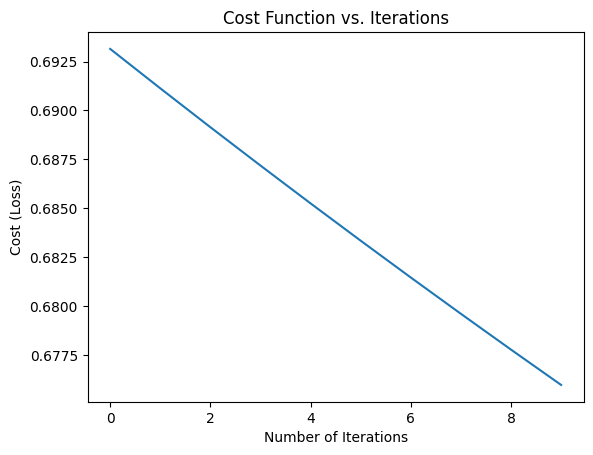

In [9]:
# Plot the loss curve
plt.plot(model.losses)
plt.title("Cost Function vs. Iterations")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost (Loss)")
plt.show()

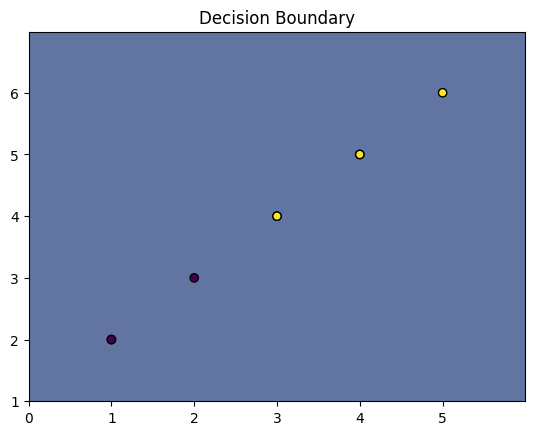

In [10]:
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = model.predict(grid).reshape(xx.shape)
    plt.contourf(xx, yy, probs, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.title("Decision Boundary")
    plt.show()

# Example usage:
plot_decision_boundary(x_train, y_train, model)

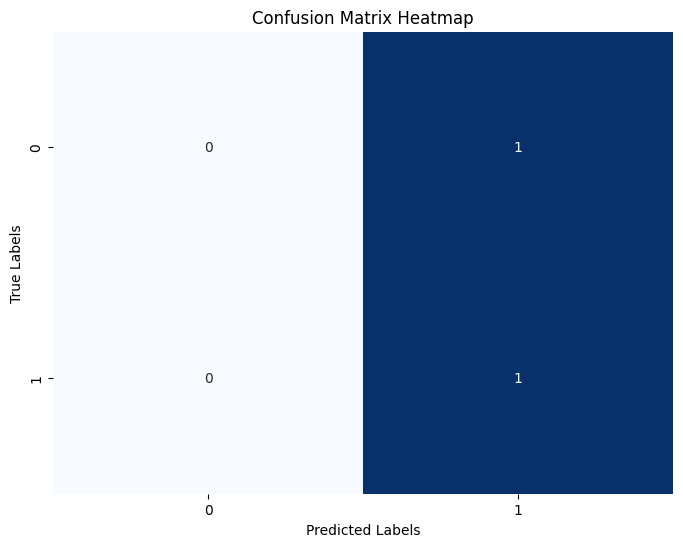

In [11]:
# Plotting the heatmap
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

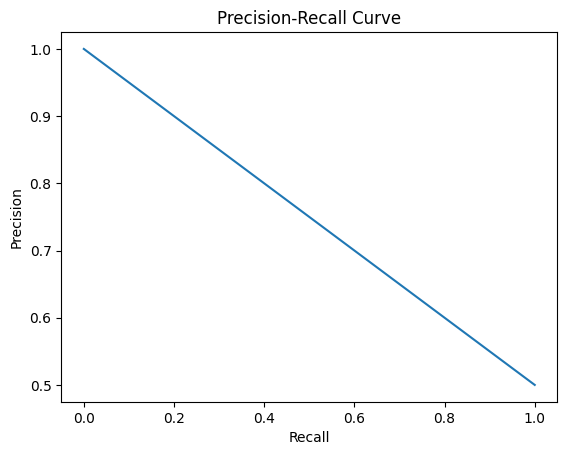

In [12]:
from sklearn.metrics import precision_recall_curve

# Assuming y_test and predictions are available
precision, recall, _ = precision_recall_curve(y_test, model.predict(x_test))

plt.plot(recall, precision)
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

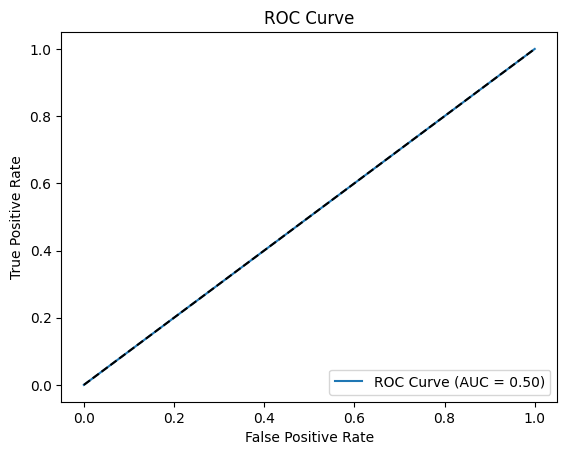

In [13]:
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming y_test and predictions are available
fpr, tpr, _ = roc_curve(y_test, model.predict(x_test))
roc_auc = roc_auc_score(y_test, model.predict(x_test))

plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

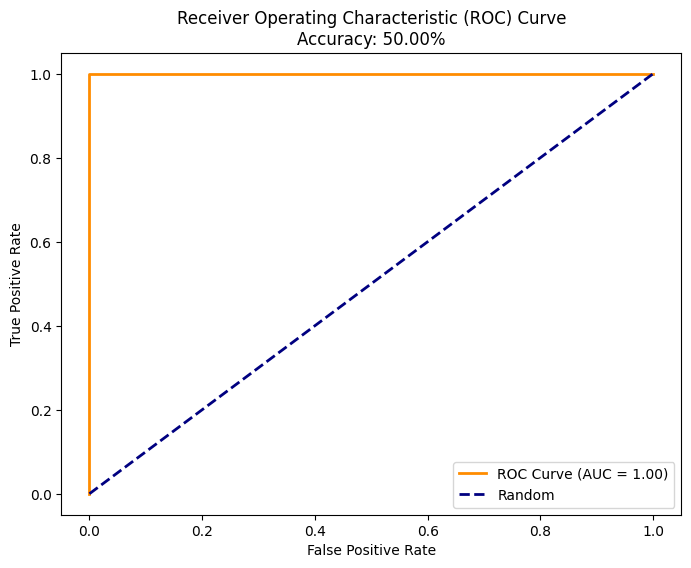

In [14]:
# Predict probabilities instead of class labels
y_prob = model.feed_forwared_network(x_test)  # Use the sigmoid output for probabilities

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# # Compute accuracy on the test set
# prediction = model.predict(plt.x_test)
# accuracy = accuracy_score(y_test, prediction)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve\nAccuracy: {:.2f}%'.format(accuracy * 100))
plt.legend(loc="lower right")
plt.show()

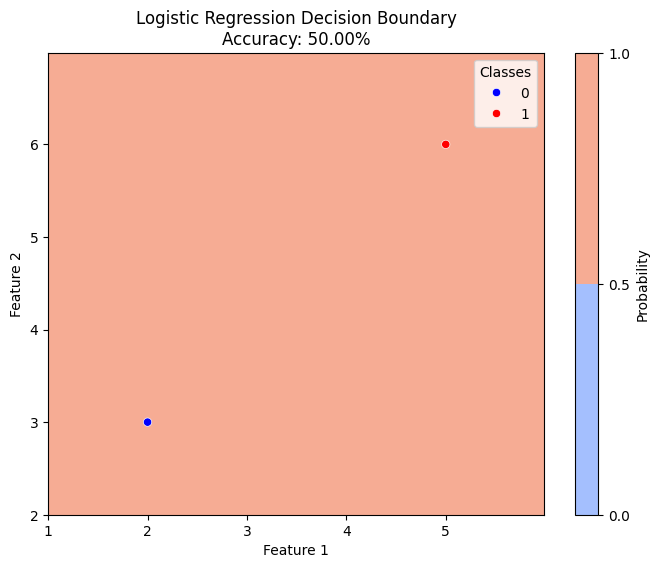

In [15]:
# Compute decision boundary
def plot_decision_boundary(X, y, model):
    # Create grid to evaluate model
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = model.feed_forwared_network(grid).reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, probs, alpha=0.8, cmap='coolwarm', levels=[0, 0.5, 1])
    plt.colorbar(label='Probability')

    # Plot data points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette={0: 'blue', 1: 'red'}, marker='o')

plt.figure(figsize=(8, 6))
plot_decision_boundary(x_test, y_test, model)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Logistic Regression Decision Boundary\nAccuracy: {:.2f}%".format(accuracy * 100))
plt.legend(title="Classes", loc="upper right")
plt.show()

<ipython-input-16-9b799ad2e0bc>:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


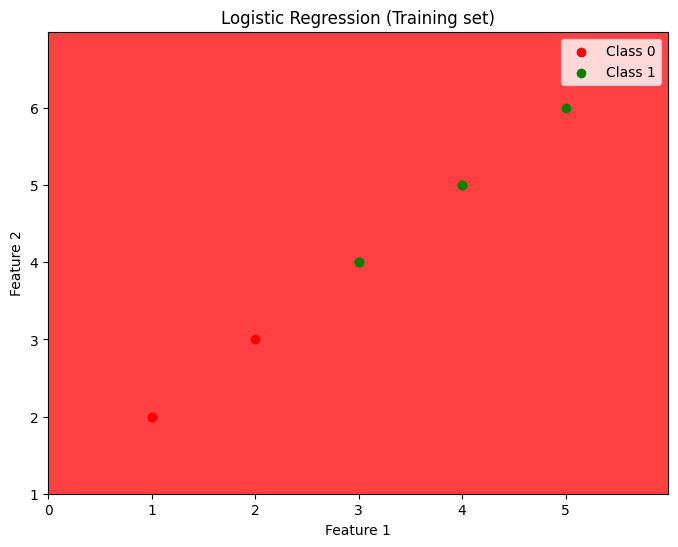

In [16]:
# Define the decision boundary visualization function
from matplotlib.colors import ListedColormap

def plot_decision_boundary(X_set, y_set, model):
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    Z = model.predict(np.array([X1.ravel(), X2.ravel()]).T)
    Z = Z.reshape(X1.shape)

    plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c=ListedColormap(('red', 'green'))(i), label=f'Class {j}')

    plt.title('Logistic Regression (Training set)')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# Plot the decision boundary and training set results
plt.figure(figsize=(8, 6))
plot_decision_boundary(x_train, y_train, model)

<ipython-input-17-a792535375df>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


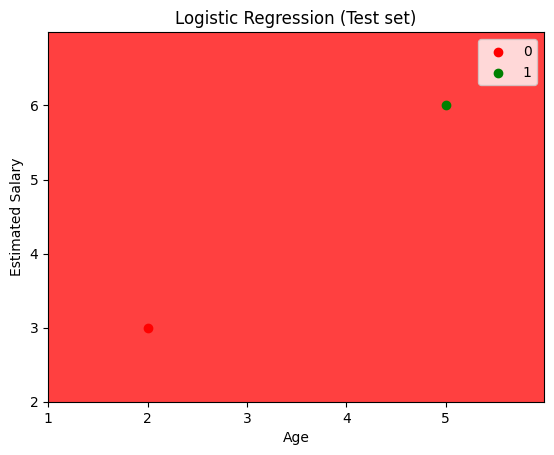

In [17]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()